# Give Me Some Credit - Classifiers

## 1. Package importing

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Data processing

In [51]:
train_dataset = pd.read_csv('cs-training.csv')
train_dataset.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [52]:
train_dataset.describe() #There is outliers that age == 0

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [53]:
train_dataset = train_dataset[train_dataset['age'] > 0] #removing the outliers
train_dataset.shape

(149999, 12)

In [54]:
train_dataset.isnull().any(axis=0) #To first check which variables has missing values

Unnamed: 0                              False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [55]:
train_dataset = train_dataset.fillna(train_dataset.mean())#Fill-in the missing values with the column means

In [56]:
train_dataset.isnull().any(axis=0) #To double check whether missing values are filled

Unnamed: 0                              False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

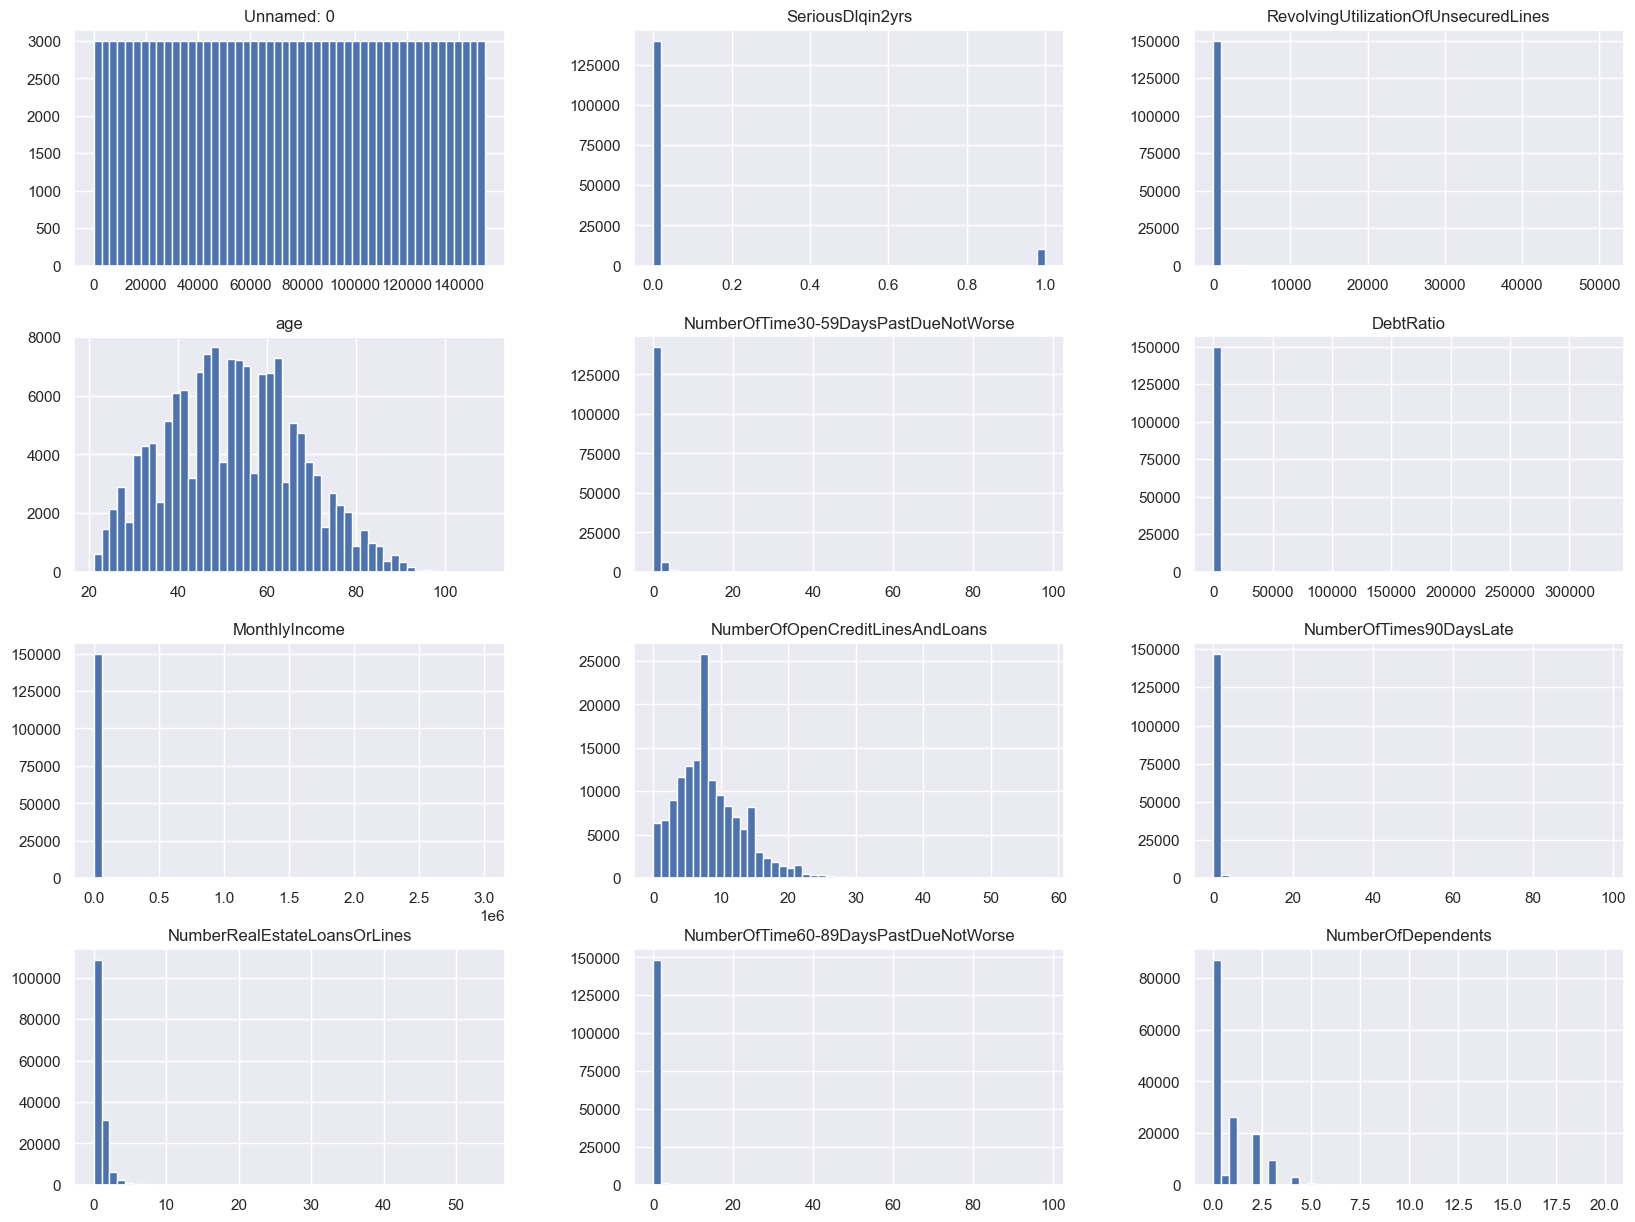

In [57]:
train_dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [58]:
#Spilt the features and targets
X_train = train_dataset.iloc[:,2:] 
y_train = train_dataset.iloc[:,1]

In [59]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

In [60]:
#loading the features in the test data set
test_dataset = pd.read_csv('cs-test.csv')
test_dataset = test_dataset.fillna(test_dataset.mean()) #Fill-in the missing values with the column means
test_dataset.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.00000,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.00000,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.00000,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.00000,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.00000,4,0,0,0,1.0
5,6,NaN,0.509791,63,0,0.342429,4140.00000,4,0,0,0,1.0
6,7,NaN,0.587778,50,0,1048.000000,0.00000,5,0,0,0,3.0
7,8,NaN,0.046149,79,1,0.369170,3301.00000,8,0,1,0,1.0
8,9,NaN,0.013527,68,0,2024.000000,6855.03559,4,0,1,0,0.0
9,10,NaN,1.000000,23,98,0.000000,0.00000,0,98,0,98,0.0


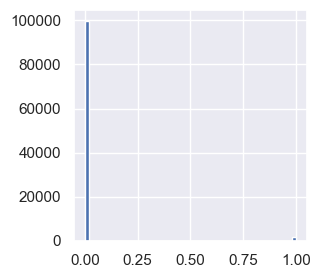

In [61]:
#loading the targets in the test data set
y_test = pd.read_csv('sampleEntry.csv')
y_test['Probability'] = y_test['Probability'].apply(lambda x: 1 if x > 0.5 else 0)

y_test['Probability'].hist(bins=50, figsize=(3,3))
plt.show()

y_to_test = np.array(y_test['Probability'])

## 3. Choose two most important features using Logistic Regression

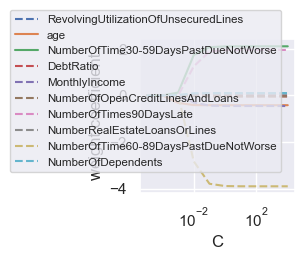

In [62]:
#L1 penalty - solver='liblinear'
from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='liblinear',
                            multi_class='ovr',
                            penalty='l1')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0], linestyle='--',
         label='RevolvingUtilizationOfUnsecuredLines')
plt.plot(params, weights[:, 1], linestyle='-',
         label='age')
plt.plot(params, weights[:, 2], linestyle='-',
         label='NumberOfTime30-59DaysPastDueNotWorse')
plt.plot(params, weights[:, 3], linestyle='--',
         label='DebtRatio')
plt.plot(params, weights[:, 4], linestyle='--',
         label='MonthlyIncome')
plt.plot(params, weights[:, 5], linestyle='--',
         label='NumberOfOpenCreditLinesAndLoans')
plt.plot(params, weights[:, 6], linestyle='--',
         label='NumberOfTimes90DaysLate')
plt.plot(params, weights[:, 7], linestyle='--',
         label='NumberRealEstateLoansOrLines')
plt.plot(params, weights[:, 8], linestyle='--',
         label='NumberOfTime60-89DaysPastDueNotWorse')
plt.plot(params, weights[:, 9], linestyle='--',
         label='NumberOfDependents')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='lower right', fontsize='x-small', bbox_to_anchor=(0.95,0.1))
plt.xscale('log')
plt.show()

### Two most important features

With the decreasing of C (increasing the regularization strength), the remaining two features with non-zero coefficients are **age** and **Number Of Time 30-59 Days Past Due Not Worse**.

In [63]:
X_std_subset = X_train_std[:,1:3] #Choose the most important two features

In [64]:
#load the test dataset
X_test = test_dataset.iloc[:,3:5]

#Standardizing the test dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_test)
X_test_std = sc.transform(X_test)

## 4. Classifires implementation

In [65]:
#importing plot_decision_regions function from chapter 3
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [66]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#Define a function to evaluate and visualize the prediction results of each model
def model_evaluation(model, true, predicted):
    
    train_accuracy = model.score(X_std_subset, y_train)
    test_accuracy = accuracy_score(true, predicted)
    report = classification_report(predicted, true)
    print(model,'\n')
    print('Train set Accuracy: ',round((train_accuracy), 2)*100,'%')
    print('Test set Accuracy: ',round((test_accuracy), 2)*100,'%')
    print('\n--------------------------------------------------\n')
    print('Model Report: \n', report)
    print('--------------------------------------------------\n')
    print('Confusion Matrix: \n')
    cm = metrics.confusion_matrix(true, predicted)
    cm = cm / np.sum(cm, axis = 1)[:,None]
    labels = y_train.unique()
    sns.set(rc={'figure.figsize':[2,2]})
    sns.heatmap(cm, xticklabels = labels,
              yticklabels = labels, 
              annot=True, 
              cmap = 'YlGnBu_r')
    plt.show()
    plt.pause(0.05)

### Logistic regression

LogisticRegression(C=0.01, multi_class='ovr', random_state=1) 

Train set Accuracy:  93.0 %
Test set Accuracy:  98.0 %

--------------------------------------------------

Model Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    101289
           1       0.08      0.60      0.13       214

    accuracy                           0.98    101503
   macro avg       0.54      0.79      0.56    101503
weighted avg       1.00      0.98      0.99    101503

--------------------------------------------------

Confusion Matrix: 



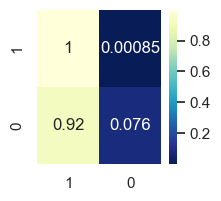

In [67]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_std_subset,y_train)
lr_predict = lr.predict(X_test_std)
model_evaluation(lr, y_to_test, lr_predict)

/var/folders/lg/sccl5mrj5n30hdt7y0dqtdpm0000gp/T/ipykernel_4530/2726331958.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/lg/sccl5mrj5n30hdt7y0dqtdpm0000gp/T/ipykernel_4530/2726331958.py:43: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


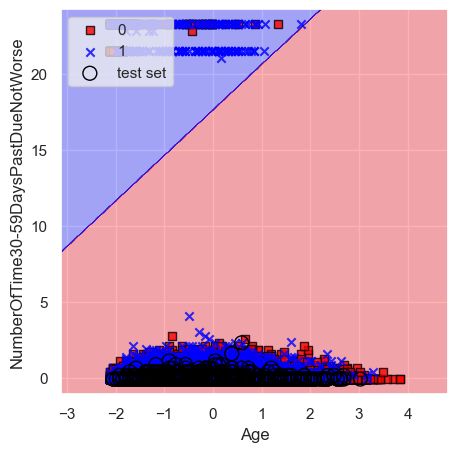

In [68]:
X_combined_std = np.vstack((X_std_subset, X_test_std))
y_combined = np.hstack((y_train, y_to_test))
fig, ax = plt.subplots(figsize=(5, 5))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(1000))
plt.xlabel('Age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.show()

### Support vector machine

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=10000, random_state=1) 

Train set Accuracy:  93.0 %
Test set Accuracy:  98.0 %

--------------------------------------------------

Model Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    101207
           1       0.09      0.53      0.16       296

    accuracy                           0.98    101503
   macro avg       0.55      0.76      0.57    101503
weighted avg       1.00      0.98      0.99    101503

--------------------------------------------------

Confusion Matrix: 



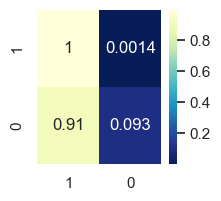

In [88]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, max_iter=10000)
svm.fit(X_std_subset, y_train)
svm_predict = svm.predict(X_test_std)
model_evaluation(svm, y_to_test, svm_predict)

/var/folders/lg/sccl5mrj5n30hdt7y0dqtdpm0000gp/T/ipykernel_4530/2726331958.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/lg/sccl5mrj5n30hdt7y0dqtdpm0000gp/T/ipykernel_4530/2726331958.py:43: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


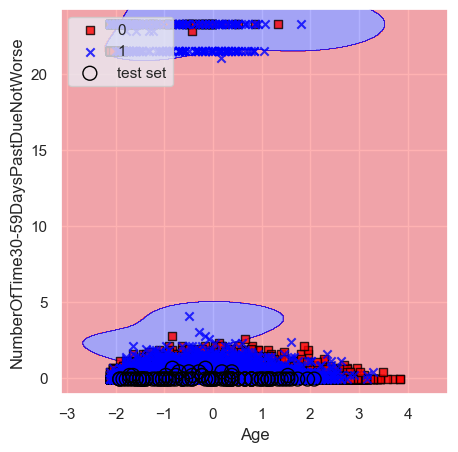

In [89]:
X_combined_std = np.vstack((X_std_subset, X_test_std))
y_combined = np.hstack((y_train, y_to_test))
fig, ax = plt.subplots(figsize=(5, 5))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(100))
plt.xlabel('Age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.show()

### Decision tree

DecisionTreeClassifier(max_depth=6, random_state=1) 

Train set Accuracy:  93.0 %
Test set Accuracy:  98.0 %

--------------------------------------------------

Model Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    101313
           1       0.08      0.70      0.14       190

    accuracy                           0.98    101503
   macro avg       0.54      0.84      0.57    101503
weighted avg       1.00      0.98      0.99    101503

--------------------------------------------------

Confusion Matrix: 



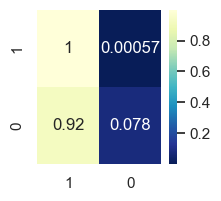

In [82]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=6, 
                                    random_state=1)
tree_model.fit(X_std_subset, y_train)
tree_predict = tree_model.predict(X_test_std)
model_evaluation(tree_model, y_to_test, tree_predict)

/var/folders/lg/sccl5mrj5n30hdt7y0dqtdpm0000gp/T/ipykernel_4530/2726331958.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/lg/sccl5mrj5n30hdt7y0dqtdpm0000gp/T/ipykernel_4530/2726331958.py:43: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


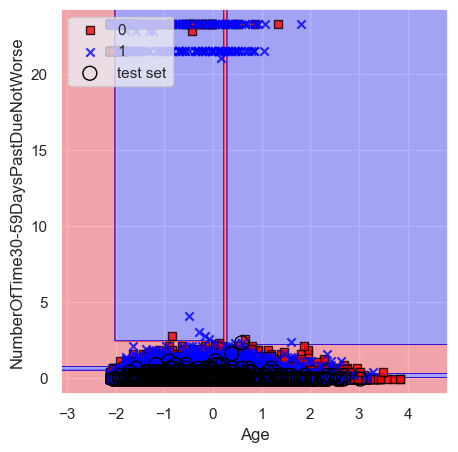

In [83]:
X_combined_std = np.vstack((X_std_subset, X_test_std))
y_combined = np.hstack((y_train, y_to_test))
fig, ax = plt.subplots(figsize=(5, 5))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=tree_model, test_idx=range(1000))
plt.xlabel('Age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper right')
plt.show()